In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Load the training dataset(trn2.csv)
df = pd.read_csv('/content/trn2.csv')
print(df.head())

        x1      x2      x3      x4      x5      x6      x7       x8      x9  \
0 -5.64000 -4.6092 -6.2871 -2.0810 -2.1911 -8.3584 -6.9223 -5.77690 -5.9610   
1 -2.93180 -7.9703 -3.5752 -1.6307 -5.9800 -2.9040 -4.9043 -6.12570 -3.8219   
2 -2.60050 -2.1472 -2.0314 -3.2542 -4.5976 -6.2064 -4.1681 -9.37610 -6.4182   
3 -2.98360 -2.8963 -6.1299 -4.8738 -6.4886 -3.5598 -5.4425 -3.80710 -6.2480   
4  0.72881 -6.8042 -5.0852 -1.8109 -4.5915 -3.2527 -3.7225 -0.75989 -3.6195   

      x10    g(x)  
0 -1.8677  25.116  
1 -2.4928  52.680  
2 -4.6966  61.213  
3 -1.6895  90.111  
4 -4.3402  56.227  


In [ ]:
# Use describe function to generate statistics
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,g(x)
count,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000
mean,-4.386601,-4.392189,-4.402003,-4.362363,-4.360416,-4.372550,-4.416083,-4.416026,-4.417676,-4.416627,53.037888
std,2.515618,2.527580,2.519025,2.484725,2.543461,2.528237,2.516338,2.508413,2.484286,2.478769,41.699843
min,-14.412000,-13.674000,-13.461000,-12.845000,-14.817000,-12.841000,-13.339000,-13.840000,-13.675000,-13.352000,-98.169000
25%,-6.082350,-6.114300,-6.094475,-6.018000,-6.104575,-6.044550,-6.097775,-6.102300,-6.093200,-6.091550,24.862000
50%,-4.412750,-4.350000,-4.356350,-4.339400,-4.360850,-4.370900,-4.425200,-4.448450,-4.410200,-4.430300,53.088000
75%,-2.673150,-2.688900,-2.711100,-2.681800,-2.631800,-2.709700,-2.733525,-2.752900,-2.785600,-2.719575,81.186500
max,5.449600,5.244300,3.877900,5.177000,4.296900,5.350000,5.851400,4.443200,4.435900,4.869800,205.150000


In [ ]:
# Checking correlation in the dataset
df.corr()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,g(x)
x1,1.000000,-0.006475,0.014586,-0.004084,-0.004352,-0.005543,0.009550,0.012682,-0.017925,0.017097,0.078918
x2,-0.006475,1.000000,-0.000396,-0.014215,0.014595,0.005007,0.002104,-0.007281,0.004520,0.014174,0.190765
x3,0.014586,-0.000396,1.000000,-0.009006,0.016593,-0.019921,0.004438,-0.009461,0.018311,-0.015836,0.250779
x4,-0.004084,-0.014215,-0.009006,1.000000,-0.012855,-0.008418,-0.006886,0.014287,0.019490,-0.001152,-0.000596
x5,-0.004352,0.014595,0.016593,-0.012855,1.000000,-0.009036,-0.000717,0.001088,-0.004739,-0.014895,-0.562012
x6,-0.005543,0.005007,-0.019921,-0.008418,-0.009036,1.000000,-0.016097,0.008861,-0.007077,0.003535,0.206770
x7,0.009550,0.002104,0.004438,-0.006886,-0.000717,-0.016097,1.000000,-0.009485,-0.015860,0.036565,-0.509831
x8,0.012682,-0.007281,-0.009461,0.014287,0.001088,0.008861,-0.009485,1.000000,0.022029,-0.011094,0.242304
x9,-0.017925,0.004520,0.018311,0.019490,-0.004739,-0.007077,-0.015860,0.022029,1.000000,0.026063,-0.397098
x10,0.017097,0.014174,-0.015836,-0.001152,-0.014895,0.003535,0.036565,-0.011094,0.026063,1.000000,-0.218915


In [ ]:
# Handling Outliers by implementing the IQR (Interquartile Range)
Q1 = df.quantile(0.25)  # First quartile (25th percentile)
Q3 = df.quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1           # Interquartile Range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", df_cleaned.shape)

# Update X and y with the cleaned data
X = df_cleaned.drop('g(x)', axis=1)
y = df_cleaned['g(x)']

Shape before removing outliers: (5400, 11)
Shape after removing outliers: (5006, 11)


In [ ]:
# Feature scaling by applying standardisation using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

print("Shape: ", X.shape, "Dimension: ", X.ndim)
print("Shape: ", y.shape, "Dimension: ", y.ndim)

Shape:  (5006, 10) Dimension:  2
Shape:  (5006,) Dimension:  1


In [ ]:
# Splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

# Logistic Regression
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
predictions = reg_model.predict(X_test)

In [ ]:
# Generating Regression model g(x)
coefficients = reg_model.coef_
intercept = reg_model.intercept_
print("Regression model g(x):")
model_equation = "g(x) = " + " + ".join(f"{coeff:.3f}*x^{i}" for i, coeff in enumerate(coefficients)) + f" + {intercept:.3f}"
print(model_equation)

Regression model g(x):
g(x) = 2.959*x^0 + 8.358*x^1 + 11.042*x^2 + 0.012*x^3 + -22.925*x^4 + 7.735*x^5 + -20.401*x^6 + 9.936*x^7 + -16.606*x^8 + -7.940*x^9 + 52.826


In [ ]:
# calculate MSE, RMSE, MAE, R2 values
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.6564172069851723
Root Mean Squared Error (RMSE): 0.8101957831198409
Mean Absolute Error (MAE): 0.6470370306230877
R-squared (R²): 0.9995733592174548


In [ ]:
# Load testing dataset(tst1.csv)
test_df = pd.read_csv('/content/tst2.csv')
test_df.head()

,-2.6835,-3.1984,-4.6245,-6.7792,-7.6956,-7.2068,-4.3557,-2.9038,-1.0789,-8.0319
0,-6.3274,-0.8306,-7.3481,-2.5849,-1.66420,-1.31280,-4.5384,-5.0834,0.78532,-1.2957
1,-7.5468,-6.2297,-4.7677,-7.5482,0.57735,-6.01580,1.9618,-3.2375,-3.57080,-3.9195
2,-3.0643,-2.0191,-2.7039,-8.2018,-6.30190,-0.15003,-3.8188,-2.3549,-4.44650,-2.9896
3,-7.0880,-6.8564,-5.1803,-6.0831,-4.58050,-2.79040,-3.5851,1.5565,-0.61696,-7.2974
4,-5.8796,-5.7867,-5.5327,-9.4828,-2.65420,-3.69500,-1.0551,-5.4270,-0.75537,-2.7584


In [ ]:
# Since the testing dataset does not have headers, x1,x2...x8 headers a inserted
header_list = ['x' + str(i) for i in range(1, 11)]
test_df.columns = header_list
test = test_df.values

In [ ]:
# Make predictions with the testing data
test_predictions = reg_model.predict(test)
test_predictions

array([  13.3177894 , -115.85378588,  292.32399483,  157.4843949 ,
        -39.83056949,  109.60412817,   73.87701145,  165.66238218,
        230.00210133,  281.52519048,  159.60222672,  170.5447519 ,
        481.37438818,  370.93958797,   73.99159931,  132.7453136 ,
         67.24945448,  112.5937358 ,  203.38499253,  258.94705812,
        -55.78231529,  243.79327777,   78.96608149,  261.12781001,
        149.13929792,  185.07010665,  275.50613792,  128.00907965,
        140.18416337,  168.78446054,  168.66653961,  248.19984914,
         67.7557431 ,  267.5747868 ,  143.05654946,  314.36152001,
        105.78290089,  177.87565708,   52.10904925,  251.71092177,
        307.46579846,   47.03690658,  197.41774609,  190.45778584,
        281.03281791,  176.75835427,  111.03882761,   46.98286065,
        247.32129737,  137.30608595,  215.27222163,  219.15254703,
        122.96874459,   86.43615992,  155.82901663,  -10.85461774,
         76.19369298,  444.85300201,  251.07573137,   80.31082

In [ ]:
# Store the predicted results in a dataframe
results_df = test_df.copy()
results_df['predictions'] = test_predictions
results_df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,predictions
0,-6.3274,-0.8306,-7.3481,-2.5849,-1.66420,-1.31280,-4.5384,-5.0834,0.78532,-1.2957,13.317789
1,-7.5468,-6.2297,-4.7677,-7.5482,0.57735,-6.01580,1.9618,-3.2375,-3.57080,-3.9195,-115.853786
2,-3.0643,-2.0191,-2.7039,-8.2018,-6.30190,-0.15003,-3.8188,-2.3549,-4.44650,-2.9896,292.323995
3,-7.0880,-6.8564,-5.1803,-6.0831,-4.58050,-2.79040,-3.5851,1.5565,-0.61696,-7.2974,157.484395
4,-5.8796,-5.7867,-5.5327,-9.4828,-2.65420,-3.69500,-1.0551,-5.4270,-0.75537,-2.7584,-39.830569


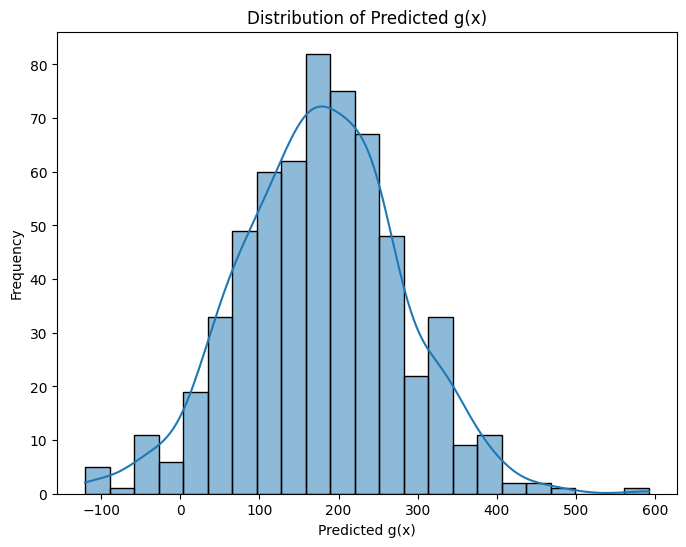

In [ ]:
# Generate a visualisation for results_df

plt.figure(figsize=(8, 6))
sns.histplot(results_df['predictions'], kde=True)
plt.xlabel('Predicted g(x)')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted g(x)')
plt.show()

In [ ]:
# remove column header from dataframe to be saved
results_df.columns = [''] * len(results_df.columns)
results_df.head()

,,,,,,,,,,,
0,-6.3274,-0.8306,-7.3481,-2.5849,-1.66420,-1.31280,-4.5384,-5.0834,0.78532,-1.2957,13.317789
1,-7.5468,-6.2297,-4.7677,-7.5482,0.57735,-6.01580,1.9618,-3.2375,-3.57080,-3.9195,-115.853786
2,-3.0643,-2.0191,-2.7039,-8.2018,-6.30190,-0.15003,-3.8188,-2.3549,-4.44650,-2.9896,292.323995
3,-7.0880,-6.8564,-5.1803,-6.0831,-4.58050,-2.79040,-3.5851,1.5565,-0.61696,-7.2974,157.484395
4,-5.8796,-5.7867,-5.5327,-9.4828,-2.65420,-3.69500,-1.0551,-5.4270,-0.75537,-2.7584,-39.830569


In [ ]:
# Exxport the dataframe into a csv file
results_df.to_csv('result2.csv', index=False, header=False)